# Project 2: Clustering

## TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

* Marketing is crucial for the growth and sustainability of any business.
* Marketers can help build the company’s brand, engage customers, grow revenue, and increase sales.
* One of the key pain points for marketers is to know their customers and identify their needs.
* By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.
* If data about the customers is available, data science can be applied to perform market segmentation.
* In this case study, we have extensive data of a bank in New York City on their customers for the past 6 months. 
* The marketing team at the bank wants to launch a targeted ad marketing campaign by dividing their customers into at least 3 distinctive groups.  

dataset includes:

o BALANCE<br>
o BALANCE_FREQUENCY<br>
o PURCHASES<br>
o INSTALLMENTS_PURCHASES<br>
o CASH_ADVANCE<br>
o PURCHASES_FREQUENCY<br>
o PURCHASES_INSTALLMENTS_FREQUENCY<br>

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

**Skills & techniques:**

- Market segmentation, Dimension reduction
- EDA: distplot, histograms, KDE
- Feature Engineering:
    - Filling missing data
- Models:
    - K-means clustering (elbow method)
    - Autoencoders
    - PCA

## TASK #2: IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv('Marketing_data.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

**Features:**

CUSTID: Identification of Credit Card holder  
BALANCE: Balance amount left in customer's account to make purchases  
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  
PURCHASES: Amount of purchases made from account  
ONEOFFPURCHASES: Maximum purchase amount done in one-go  
INSTALLMENTS_PURCHASES: Amount of purchase done in installment  
CASH_ADVANCE: Cash in advance given by the user  
PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid  
CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"  
PURCHASES_TRX: Number of purchase transactions made  
CREDIT_LIMIT: Limit of Credit Card for user  
PAYMENTS: Amount of Payment done by user  
MINIMUM_PAYMENTS: Minimum amount of payments made by user  
PRC_FULL_PAYMENT: Percent of full payment paid by user  
TENURE: Tenure of credit card service for user  

In [4]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [5]:
# Let's see who made one off purchase of ~$40000!
df[df['ONEOFF_PURCHASES'] > 40000].T

501          550
CUST_ID                                C10523       C10574
BALANCE                           13479.28821  11547.52001
BALANCE_FREQUENCY                         1.0          1.0
PURCHASES                             41050.4     49039.57
ONEOFF_PURCHASES                     40624.06     40761.25
INSTALLMENTS_PURCHASES                 426.34      8278.32
CASH_ADVANCE                              0.0   558.166886
PURCHASES_FREQUENCY                  0.833333          1.0
ONEOFF_PURCHASES_FREQUENCY           0.666667          1.0
PURCHASES_INSTALLMENTS_FREQUENCY     0.416667     0.916667
CASH_ADVANCE_FREQUENCY                    0.0     0.083333
CASH_ADVANCE_TRX                            0            1
PURCHASES_TRX                             157          101
CREDIT_LIMIT                          17000.0      22500.0
PAYMENTS                          36066.75068  46930.59824
MINIMUM_PAYMENTS                  15914.48462  2974.069421
PRC_FULL_PAYMENT                     0.083333         0.25
TENURE                                     12           12

In [6]:
# Let's see who made cash advance of ~$47000!
df[df['CASH_ADVANCE'] > 47000].T
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

2159
CUST_ID                                C12226
BALANCE                           10905.05381
BALANCE_FREQUENCY                         1.0
PURCHASES                              431.93
ONEOFF_PURCHASES                        133.5
INSTALLMENTS_PURCHASES                 298.43
CASH_ADVANCE                      47137.21176
PURCHASES_FREQUENCY                  0.583333
ONEOFF_PURCHASES_FREQUENCY               0.25
PURCHASES_INSTALLMENTS_FREQUENCY          0.5
CASH_ADVANCE_FREQUENCY                    1.0
CASH_ADVANCE_TRX                          123
PURCHASES_TRX                              21
CREDIT_LIMIT                          19600.0
PAYMENTS                          39048.59762
MINIMUM_PAYMENTS                  5394.173671
PRC_FULL_PAYMENT                          0.0
TENURE                                     12

## TASK #3: VISUALIZE AND EXPLORE DATASET

In [7]:
# Let's see if we have any missing data
df.isna().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

It should be fine to fill out two columns with the median/mean of others.

In [8]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

/tmp/ipykernel_10700/976611308.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)


In [9]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

/tmp/ipykernel_10700/4146825323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)


In [10]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# Check if we have duplicated entries in the data
df.duplicated().sum()

0

In [12]:
# Let's drop Customer ID since it has no meaning here
df.drop(columns=['CUST_ID'], inplace=True)
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [13]:
print(df.columns)
print(f'# of columns: {df.shape[1]}')

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
# of columns: 17


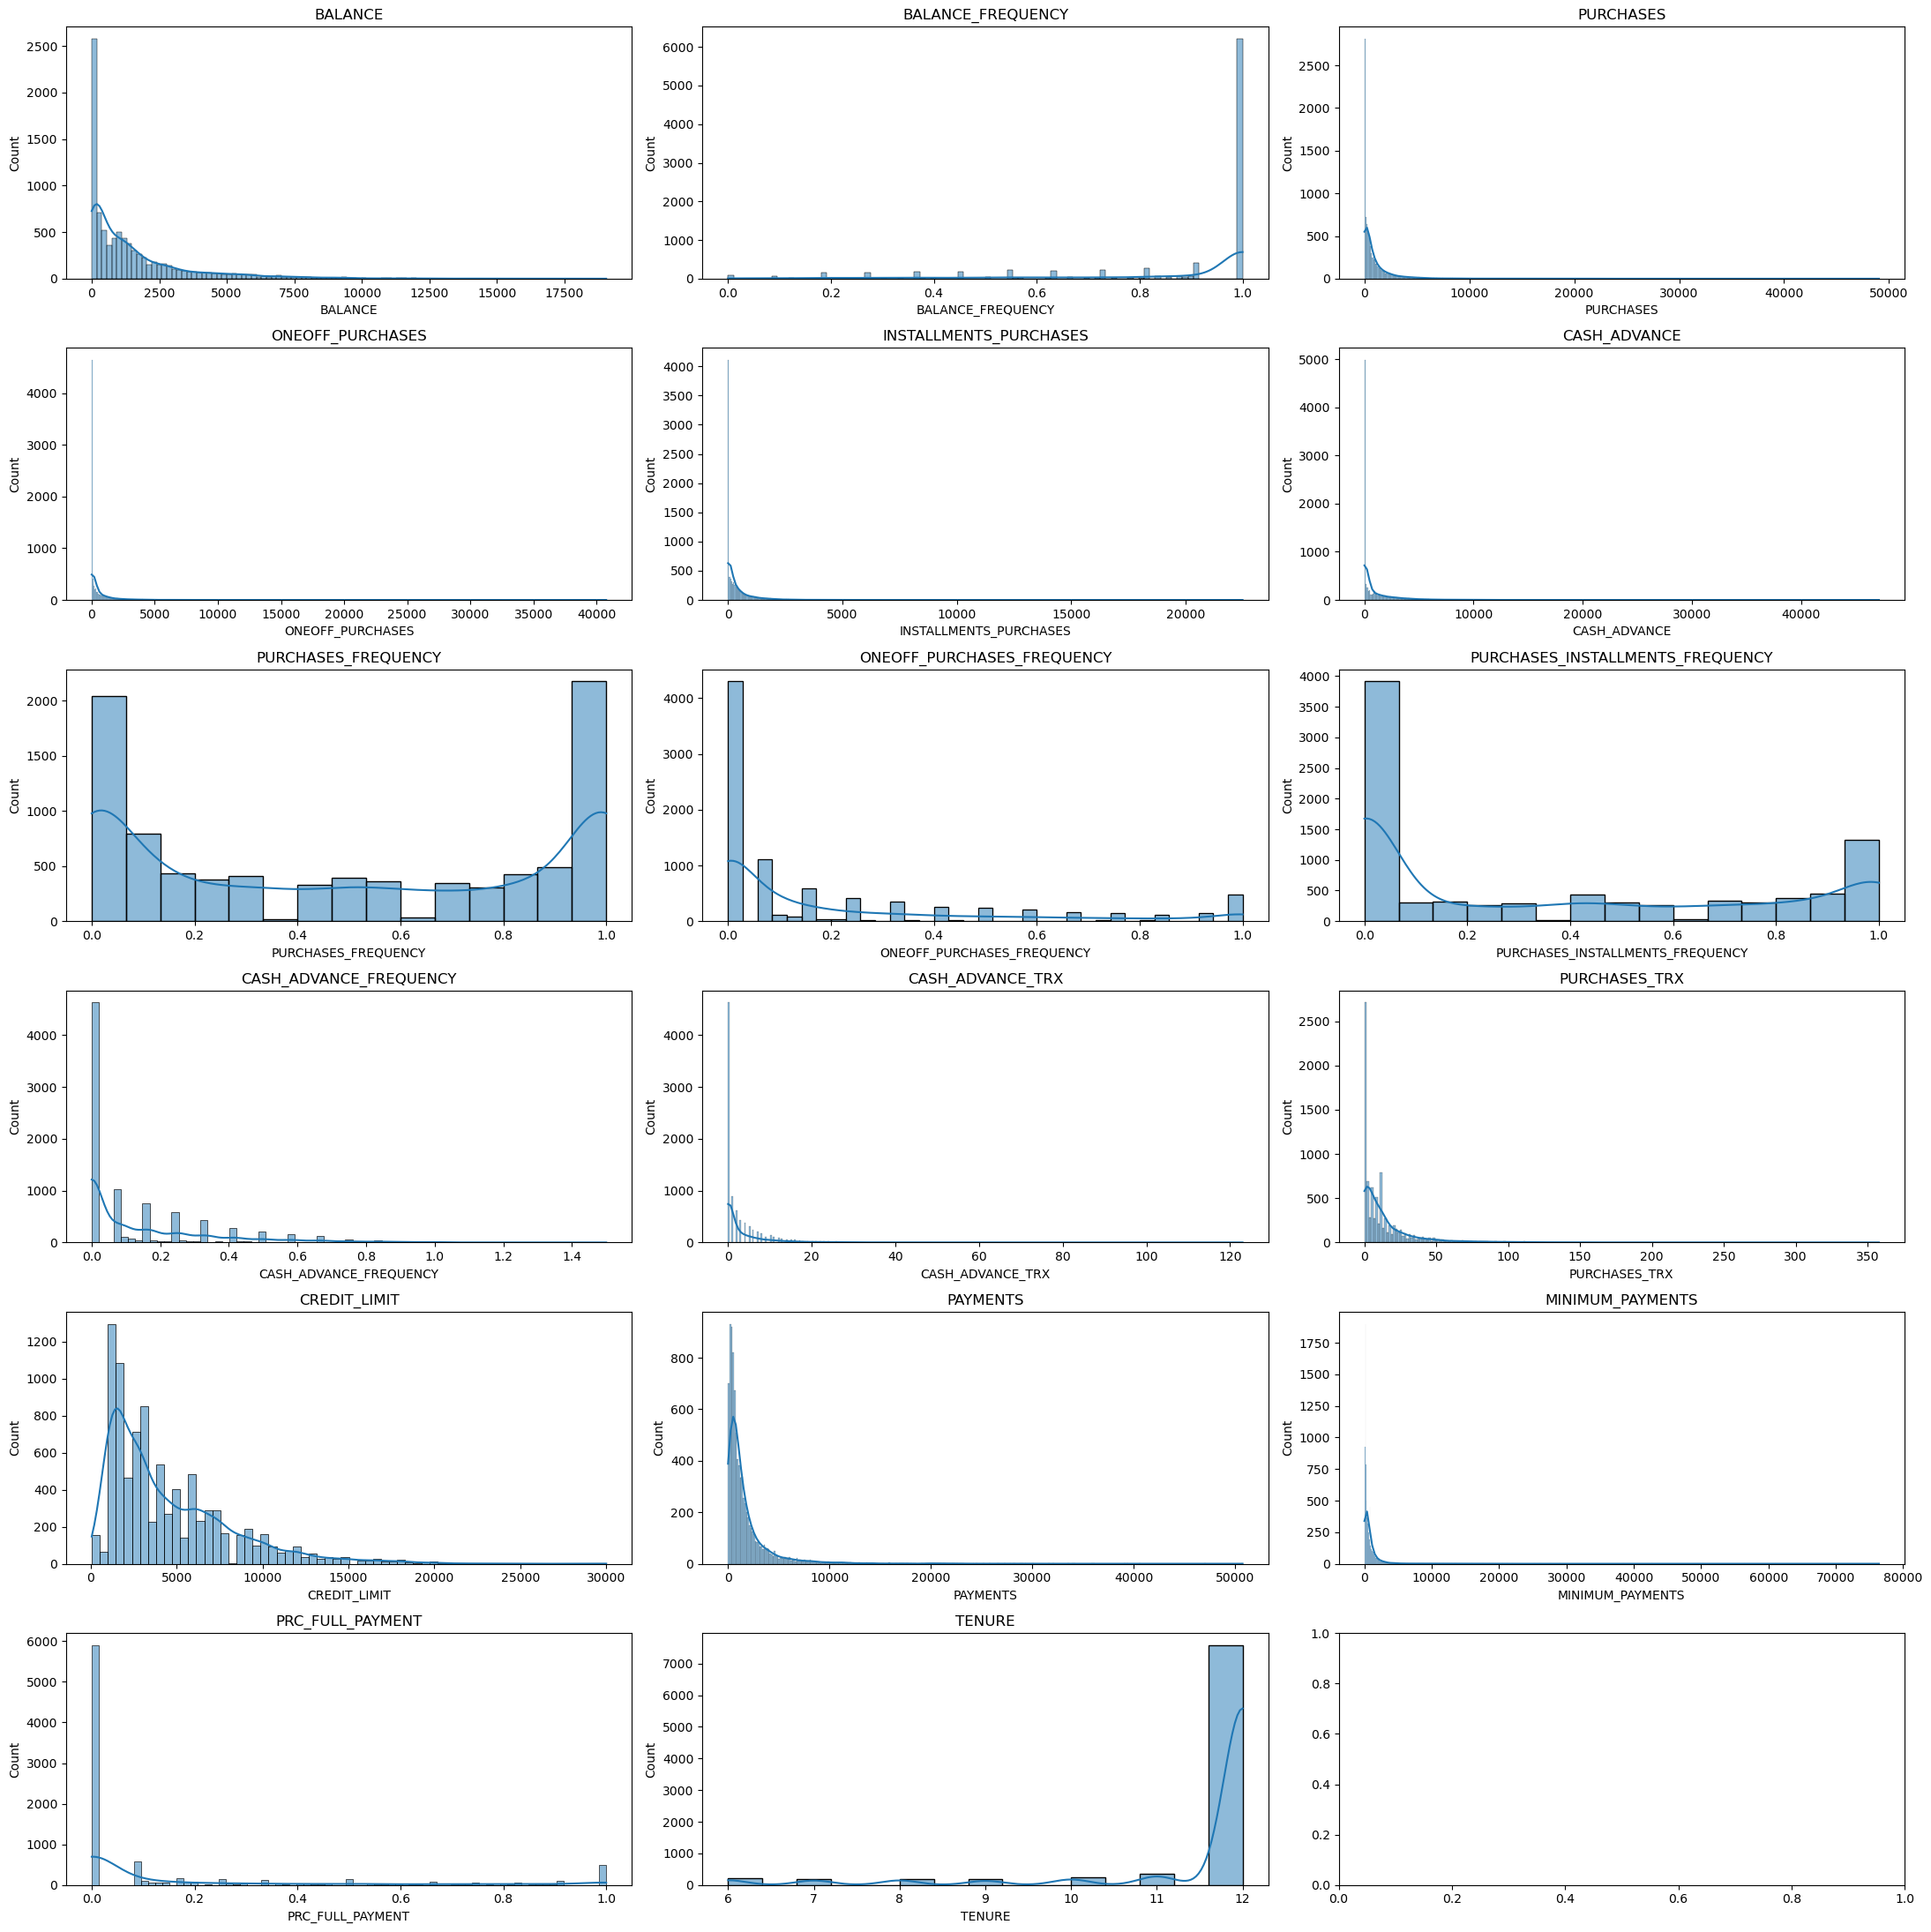

In [14]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

fig, axes = plt.subplots(6,3, figsize=(22, 22))
axes = axes.ravel()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)

plt.tight_layout()

/home/ashkan/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


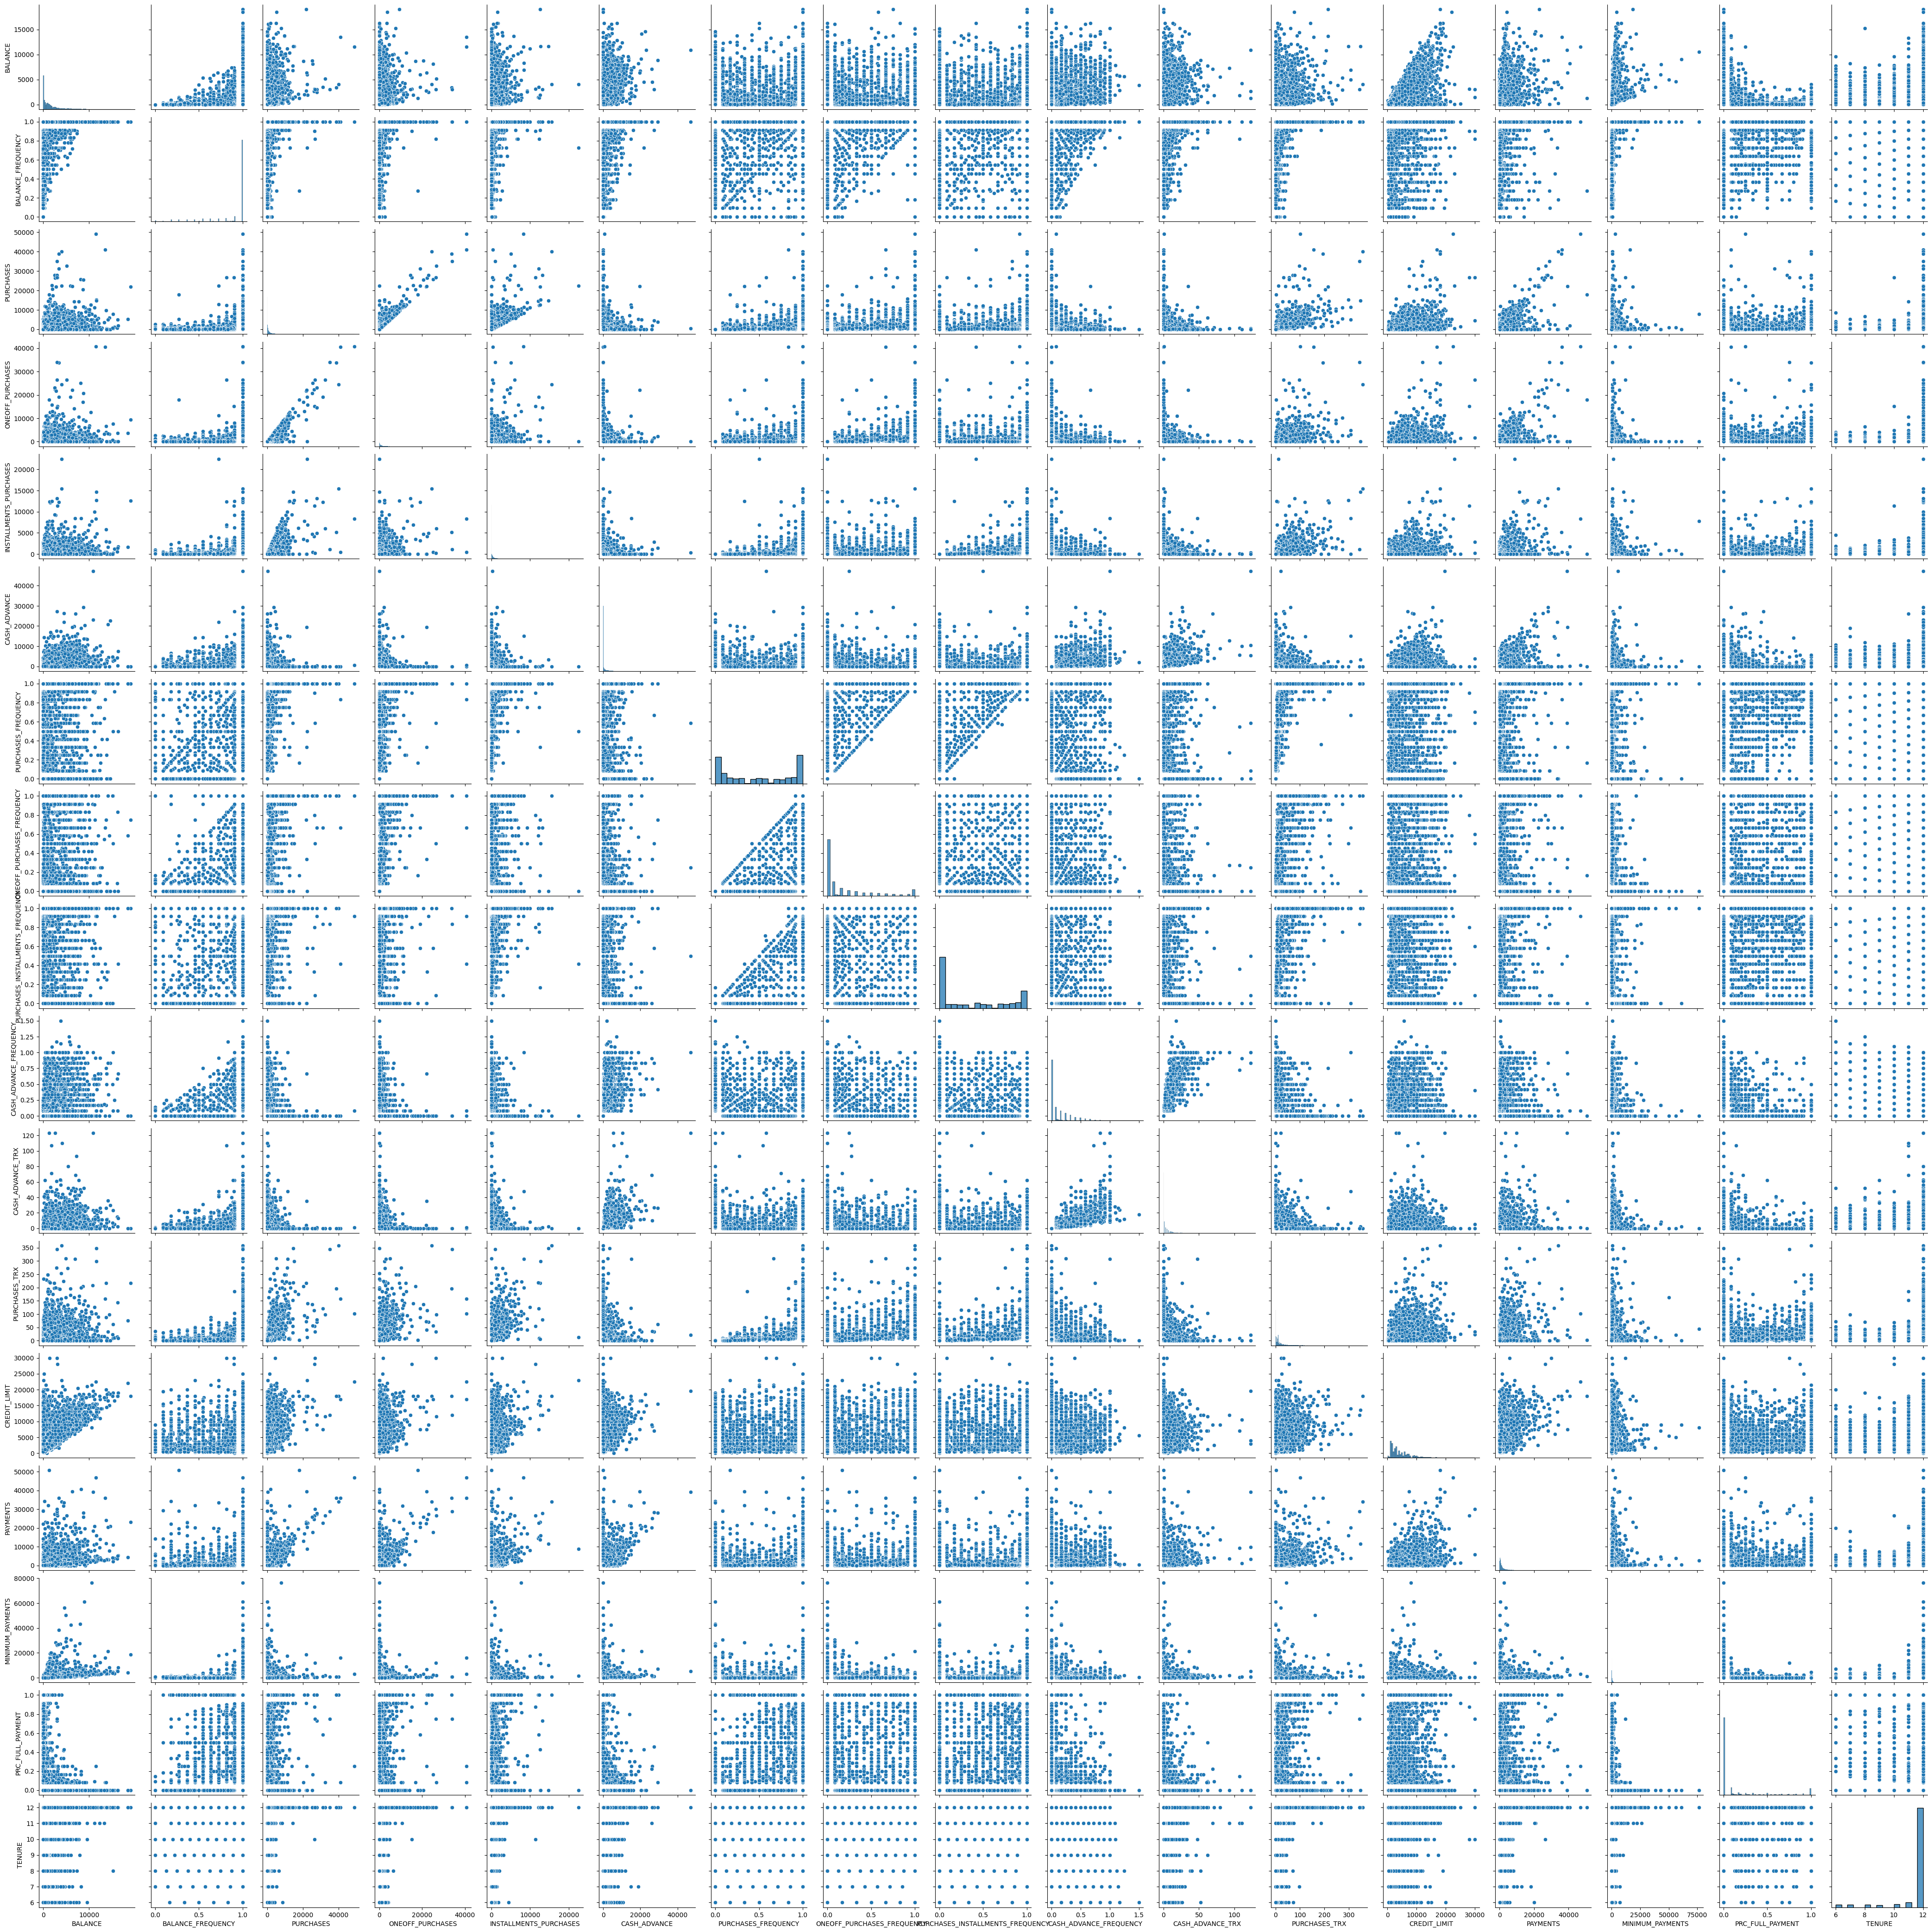

In [15]:
sns.pairplot(df)

                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT

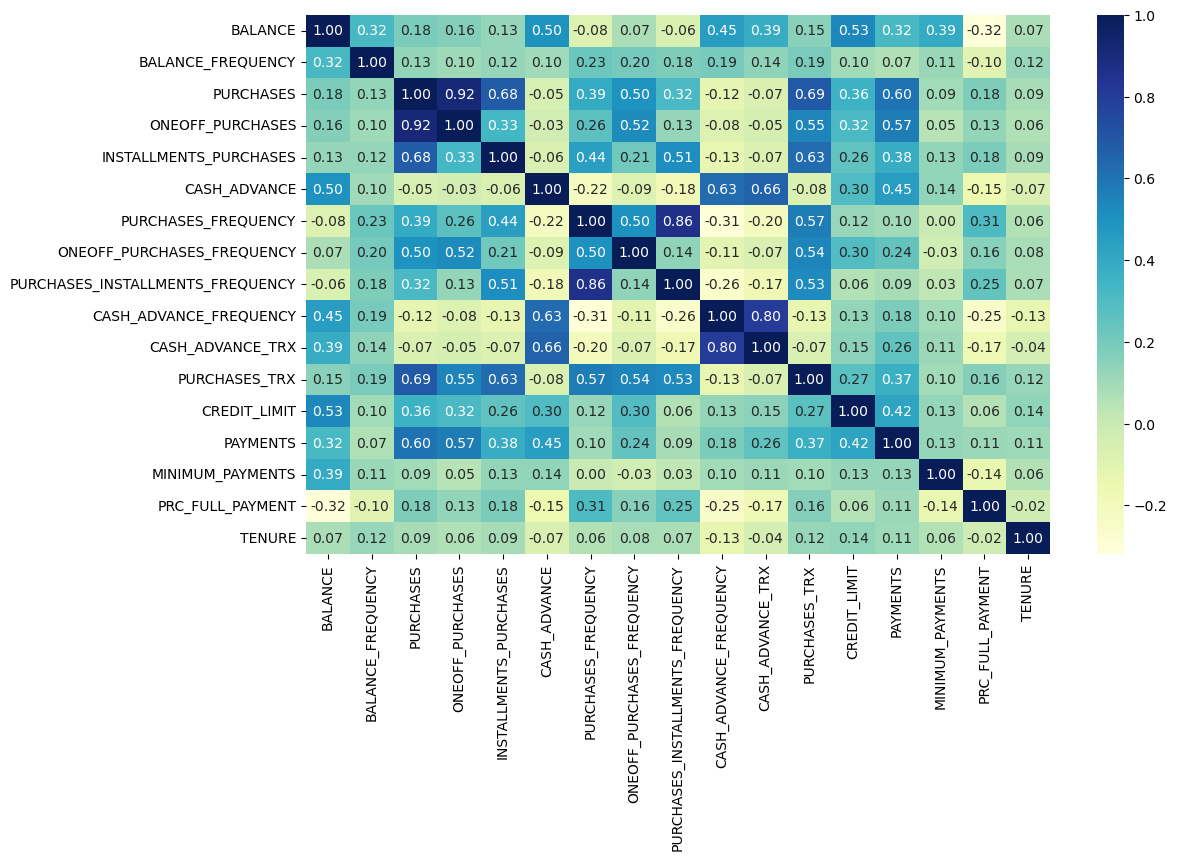

In [16]:
corr = df.corr()
print(corr)
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu')   # from low to high: yellow to green to blue
plt.show()


In [17]:

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


## TASK #4: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [18]:
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled[:3])

[[-0.73198937 -0.24943448 -0.42489974 -0.35693402 -0.34907882 -0.46678555
  -0.80649035 -0.67866081 -0.70731317 -0.67534886 -0.47606982 -0.51133325
  -0.96043334 -0.52897879 -0.31096755 -0.52555097  0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 -0.35693402 -0.45457623  2.60560451
  -1.22175806 -0.67866081 -0.91699519  0.57396272  0.11007385 -0.59179588
   0.68863903  0.81864213  0.08931021  0.2342269   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823  0.10888851 -0.45457623 -0.46678555
   1.26984323  2.67345108 -0.91699519 -0.67534886 -0.47606982 -0.10902012
   0.82606173 -0.38380474 -0.10166318 -0.52555097  0.36067954]]


In [19]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

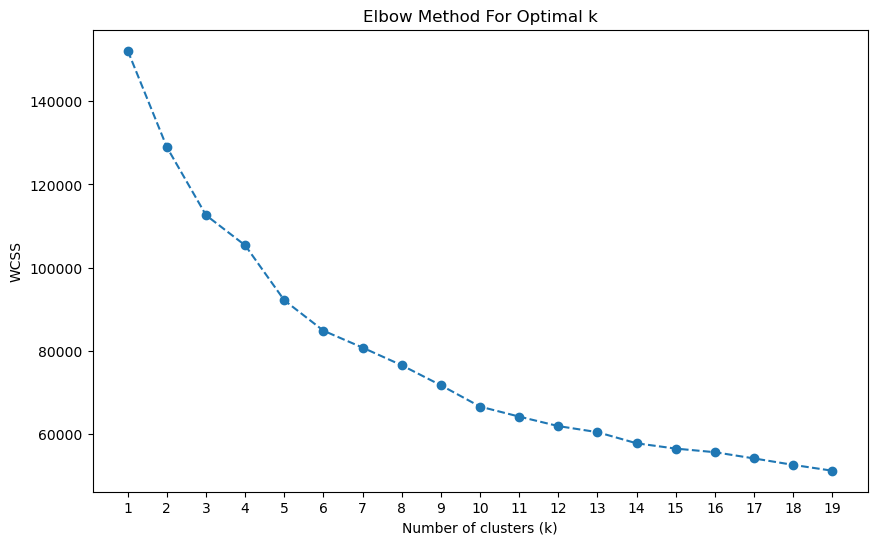

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.show()

In [21]:

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

## TASK #5: APPLY K-MEANS METHOD

In [22]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_
print(labels)

[7 3 5 ... 2 7 1]


In [23]:
kmeans.cluster_centers_.shape

(8, 17)

In [24]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
cluster_centers

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  2.058233           0.380125  -0.008668         -0.018266   
1 -0.697312          -2.143216  -0.315217         -0.234345   
2 -0.423285           0.306369  -0.059228         -0.245620   
3  0.930844           0.337142  -0.339787         -0.243746   
4  1.374491           0.412070   7.177493          6.384202   
5  0.164517           0.429473   0.940910          0.887776   
6  1.210379           0.466916   0.002326         -0.286478   
7 -0.136799           0.373512  -0.320844         -0.201091   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.012715      3.443464            -0.166359   
1               -0.314691     -0.311810            -0.559017   
2                0.311194     -0.377428             1.006329   
3               -0.355650      0.950975            -0.732450   
4                5.239545      0.016050             1.082454   
5                0.593733     -0.297602             1.099708   
6                0.530986     -0.040978             0.064311   
7               -0.389067     -0.233015            -0.739663   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000556                         -0.114164   
1                   -0.424876                         -0.459982   
2                   -0.378927                          1.188022   
3                   -0.361609                         -0.635260   
4                    1.917512                          1.031769   
5                    1.847568                          0.564352   
6                   -0.558459                          0.305943   
7                   -0.281685                         -0.722615   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                2.464589          3.214804       0.038914      1.388970   
1               -0.483072         -0.366196      -0.425994     -0.210357   
2               -0.481567         -0.370117       0.137881     -0.332000   
3                1.445542          0.994548      -0.430999      0.394792   
4               -0.290144         -0.107898       4.786628      2.181050   
5               -0.393199         -0.307858       1.198653      0.719818   
6               -0.260594         -0.091820       0.196738     -0.058635   
7               -0.134223         -0.197983      -0.443459     -0.397414   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  2.012618          0.571945         -0.287571  0.036356  
1 -0.226025         -0.255247          0.264202 -0.176963  
2 -0.254585         -0.127285          0.402403 -0.042480  
3  0.086235          0.159508         -0.431688 -0.283473  
4  4.962364          0.709040          0.864673  0.332658  
5  0.392337         -0.040770          0.432402  0.276054  
6 -0.083957         10.408907         -0.525551  0.294258  
7 -0.294149         -0.092992         -0.445219  0.100819

In [25]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers_unscaled = scaler.inverse_transform(cluster_centers)
cluster_centers_unscaled_df = pd.DataFrame(cluster_centers_unscaled, columns=df.columns)
cluster_centers_unscaled_df

# 0. First customers cluster (revolvers):
# who use credit card as a loan (most lucrative sector)
# highest balance ($5848) and cash advance (~$8200), relatively low purchase frequency (0.42),
# high cash advance frequency (0.62), high cash advance transactions (25) and low percentage of full payment (0.07%)


# 1. Second Customers cluster (Transactors):
# Those are customers who pay least amount of intrerest charges and careful with their money,
# Cluster with lowest balance ($113) and cash advance ($325), Percentage of full payment = 0.23%


# 4. Third customer cluster (VIP/Prime):
# high credit limit $12400 and highest percentage of full payment,
# target for increase credit limit and increase spending habits


BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
0  5848.513259           0.967319    984.685104        562.119201   
1   113.079432           0.369563    329.738267        203.472183   
2   683.443581           0.949847    876.663311        184.758400   
3  3501.948033           0.957137    277.244641        187.868206   
4  4425.362379           0.974886  16338.028250      11188.905375   
5  1906.902342           0.979009   3013.474153       2065.963667   
6  4083.777061           0.987879   1008.174444        116.942444   
7  1279.738367           0.965752    317.717399        258.668039   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              422.565903   8199.976109             0.423583   
1              126.496698    324.991337             0.265990   
2              692.476679    187.386829             0.894239   
3               89.457512   2973.109920             0.196383   
4             5149.122875   1012.529590             0.924792   
5              947.972735    354.785761             0.931716   
6              891.232000    892.937661             0.516162   
7               59.238897    490.228592             0.193488   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.202623                          0.319066   
1                    0.075709                          0.181629   
2                    0.089416                          0.836588   
3                    0.094583                          0.111969   
4                    0.774489                          0.774489   
5                    0.753623                          0.588725   
6                    0.035859                          0.486027   
7                    0.118426                          0.077252   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.628334         25.187500      15.677083   9548.090278   
1                0.038477          0.749806       4.121212   3729.086165   
2                0.038778          0.723047      18.137039   3286.497461   
3                0.424412         10.035885       3.996810   5930.864869   
4                0.077083          2.512500     133.687500  12430.000000   
5                0.056461          1.147920      44.503852   7113.441658   
6                0.082997          2.622222      19.600000   4281.111111   
7                0.108285          1.897740       3.687093   3048.493553   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
0   7559.476647       2197.100405      6.960499e-02  11.565972  
1   1078.824664        269.364053      2.309892e-01  11.280497  
2    996.144363        567.574172      2.714105e-01  11.460470  
3   1982.786503       1235.932054      2.745343e-02  11.137959  
4  16098.700812       2516.595215      4.066166e-01  11.962500  
5   2868.920117        769.194924      2.801849e-01  11.886749  
6   1490.095282      25121.724754      8.326673e-17  11.911111  
7    881.610354        647.493591      2.349562e-02  11.652241

In [26]:
labels.shape, labels.max(), labels.min()

((8950,), 7, 0)

In [27]:
# Equivalent to kmeans.fit() + kmeans.labels_, we can do it in one step as:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([7, 3, 5, ..., 2, 7, 1], dtype=int32)

In [28]:
# concatenate the clusters labels to our original dataframe

df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        7  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        5  
3     0.000000        864.206542          0.000000      12        7  
4   678.334763        244.791237          0.000000      12        7

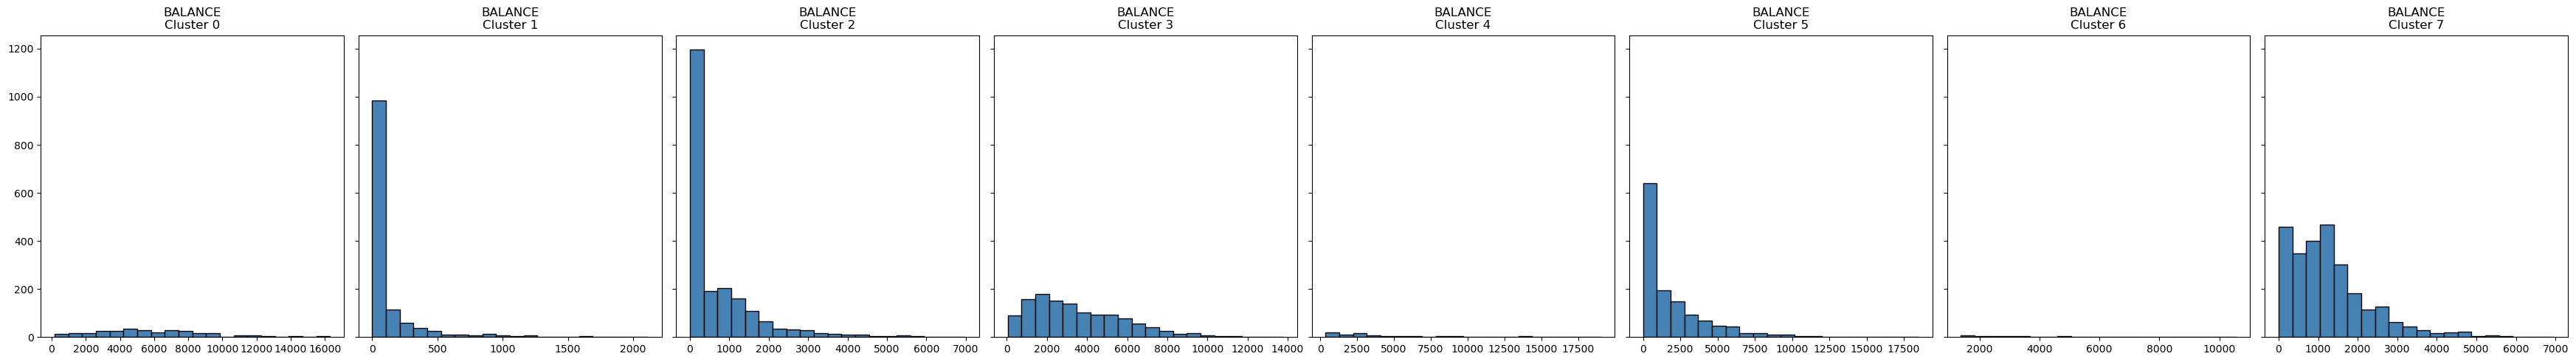

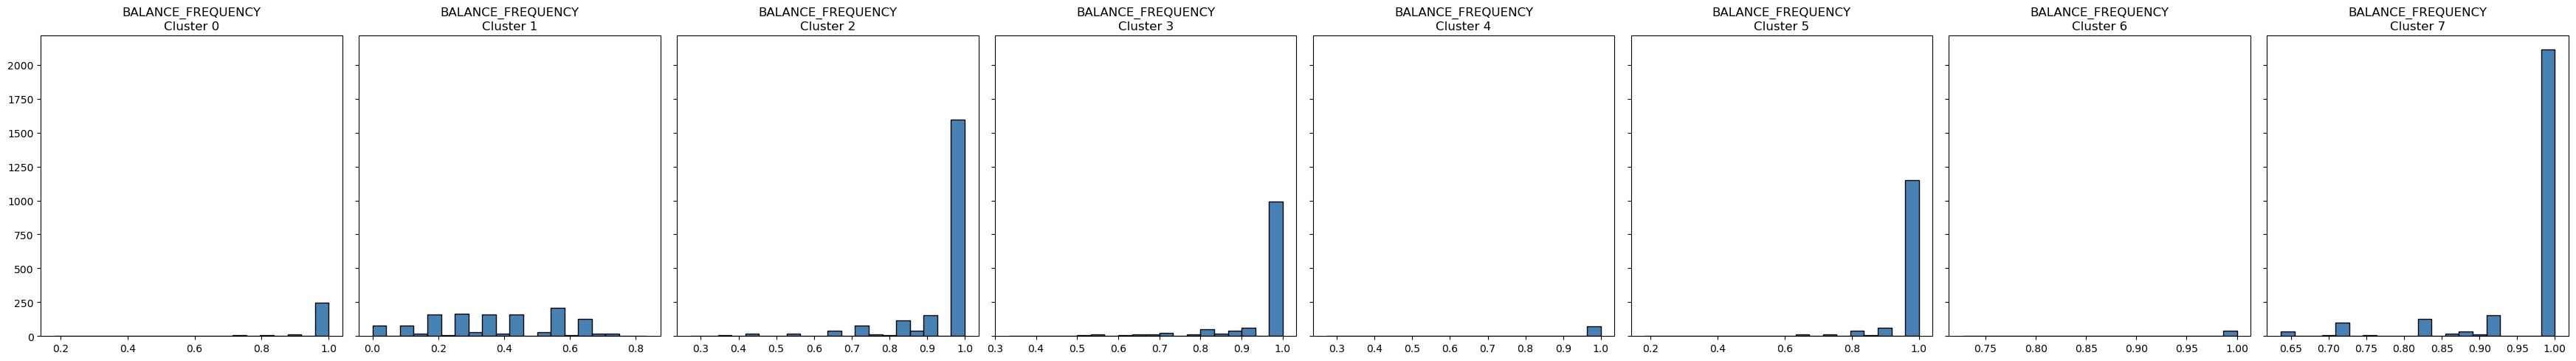

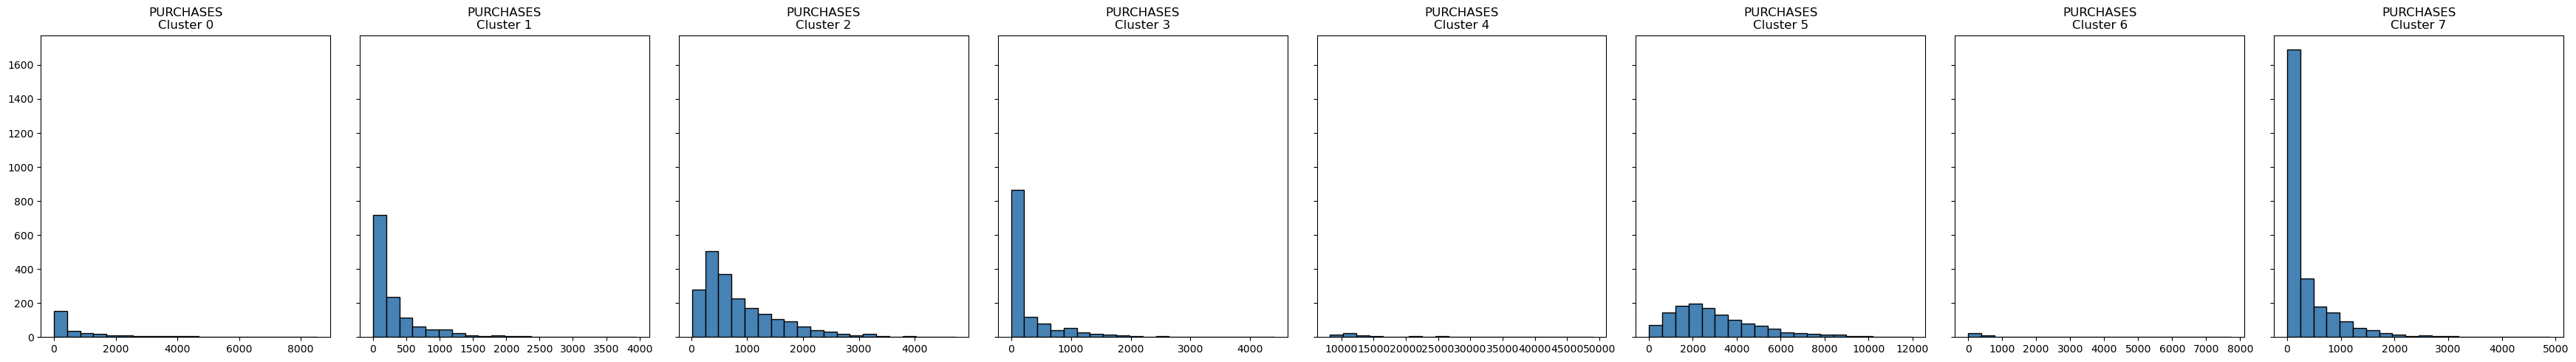

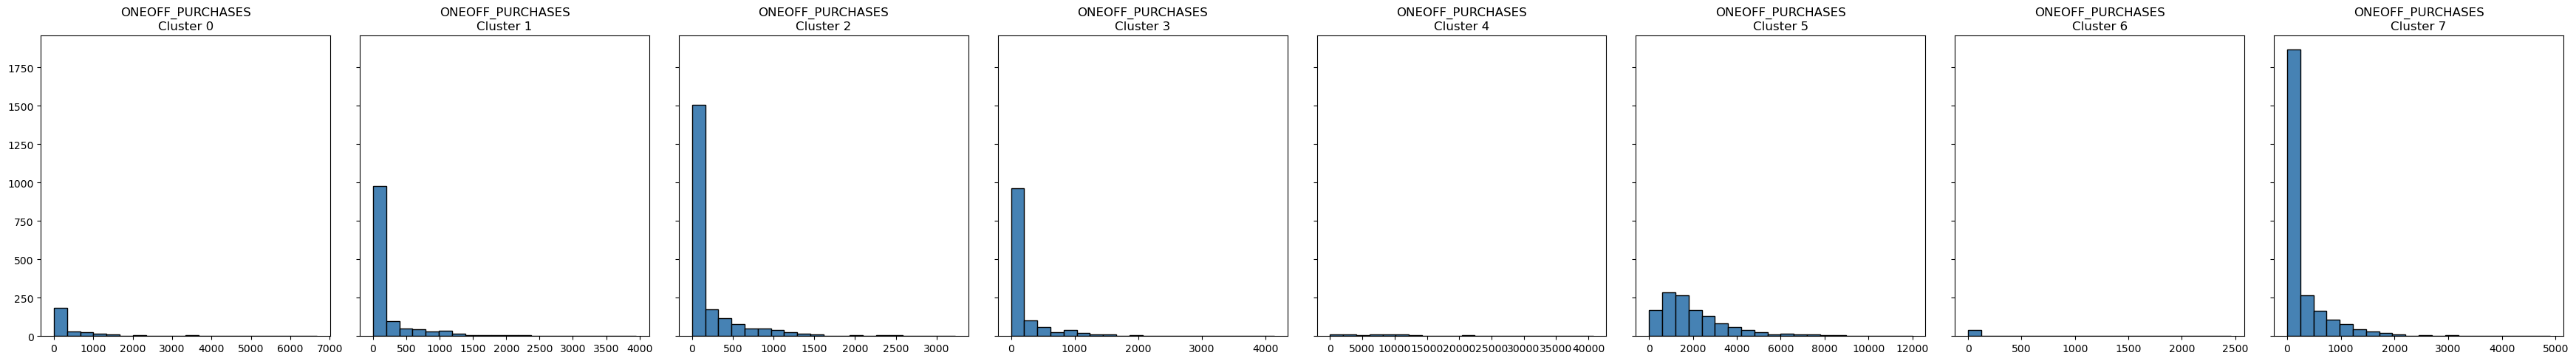

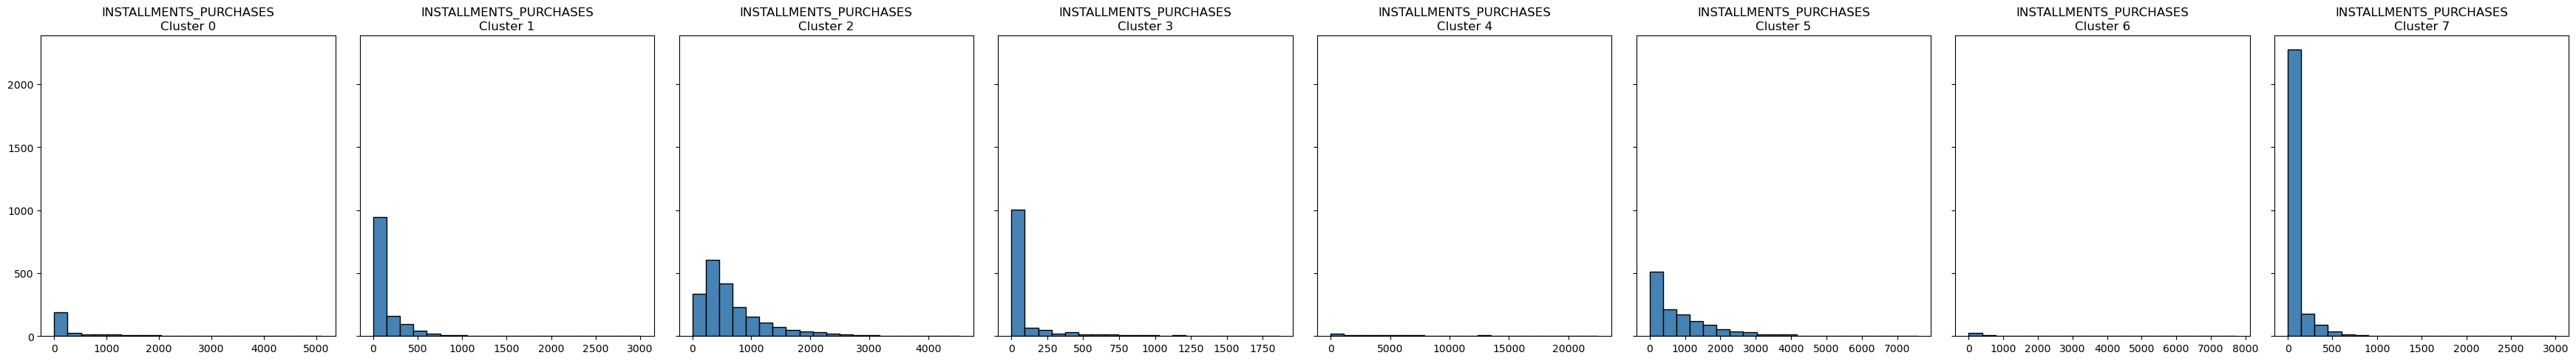

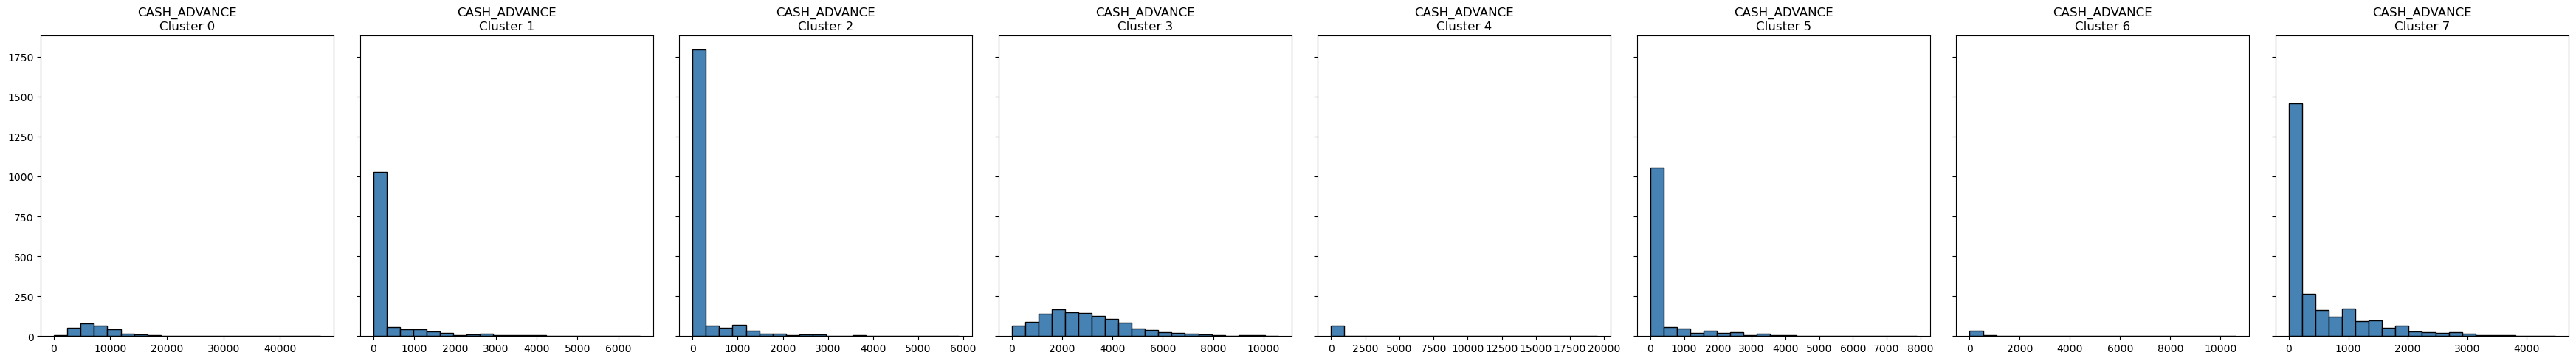

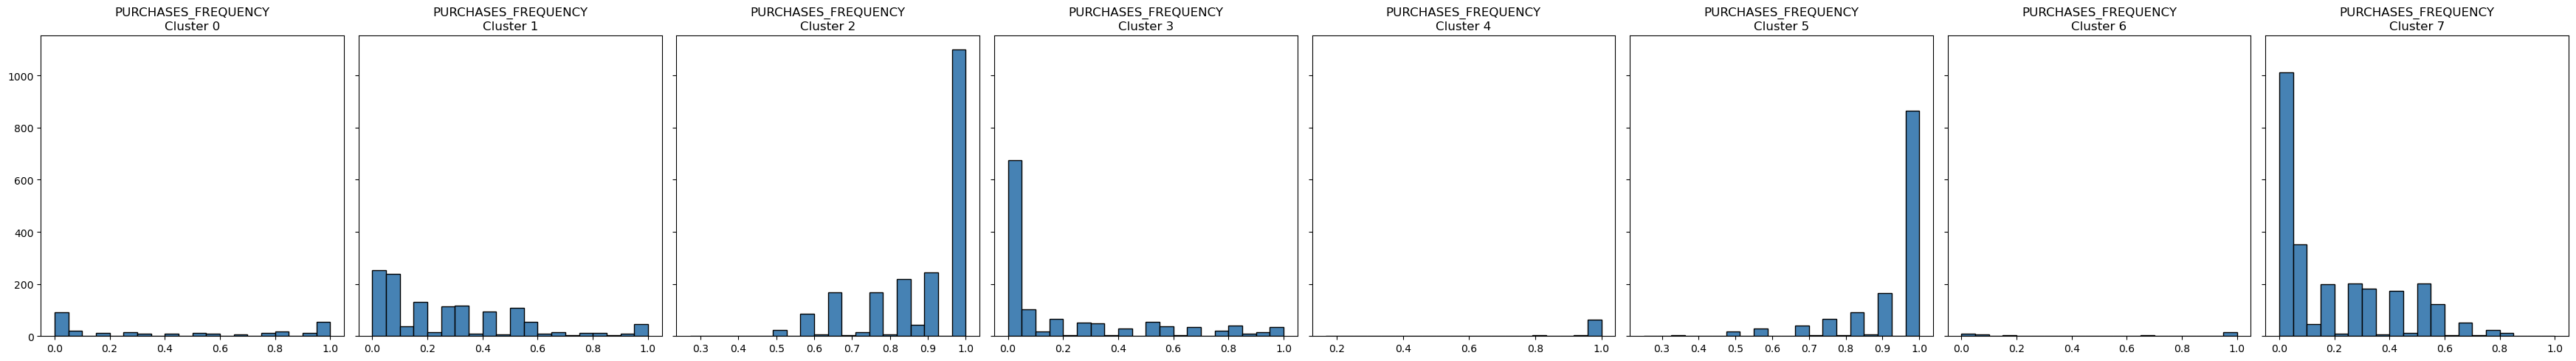

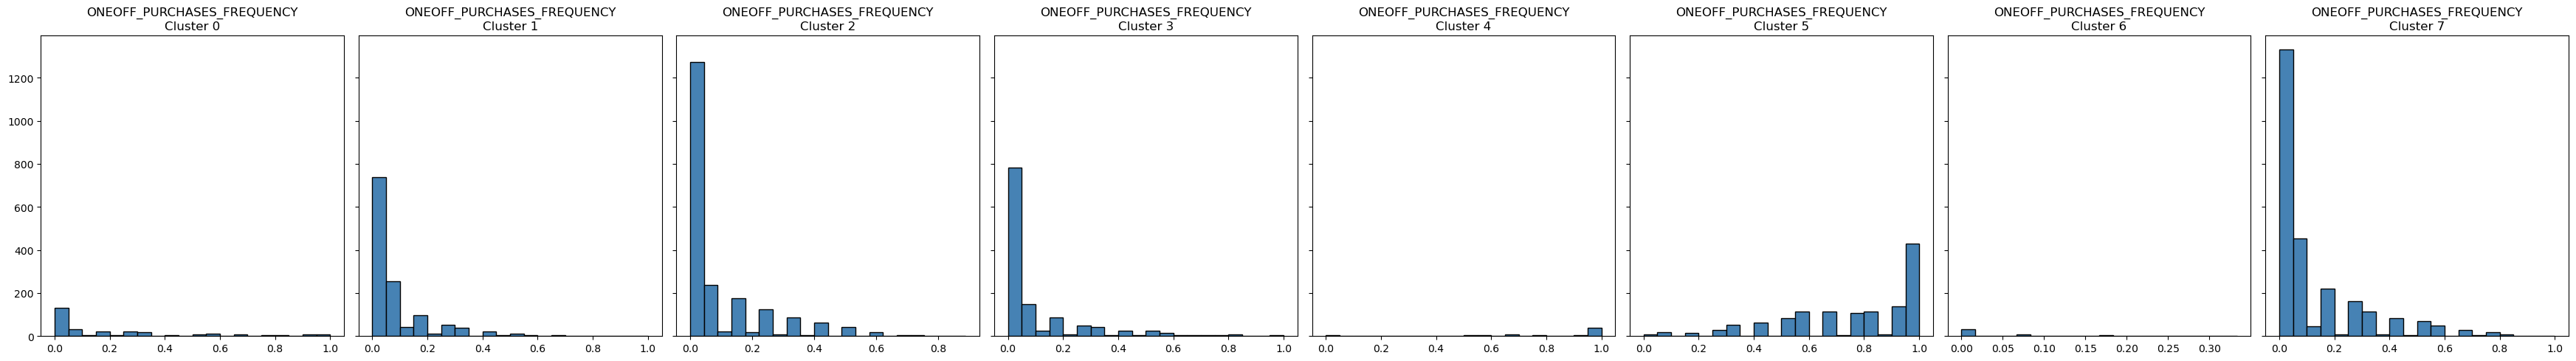

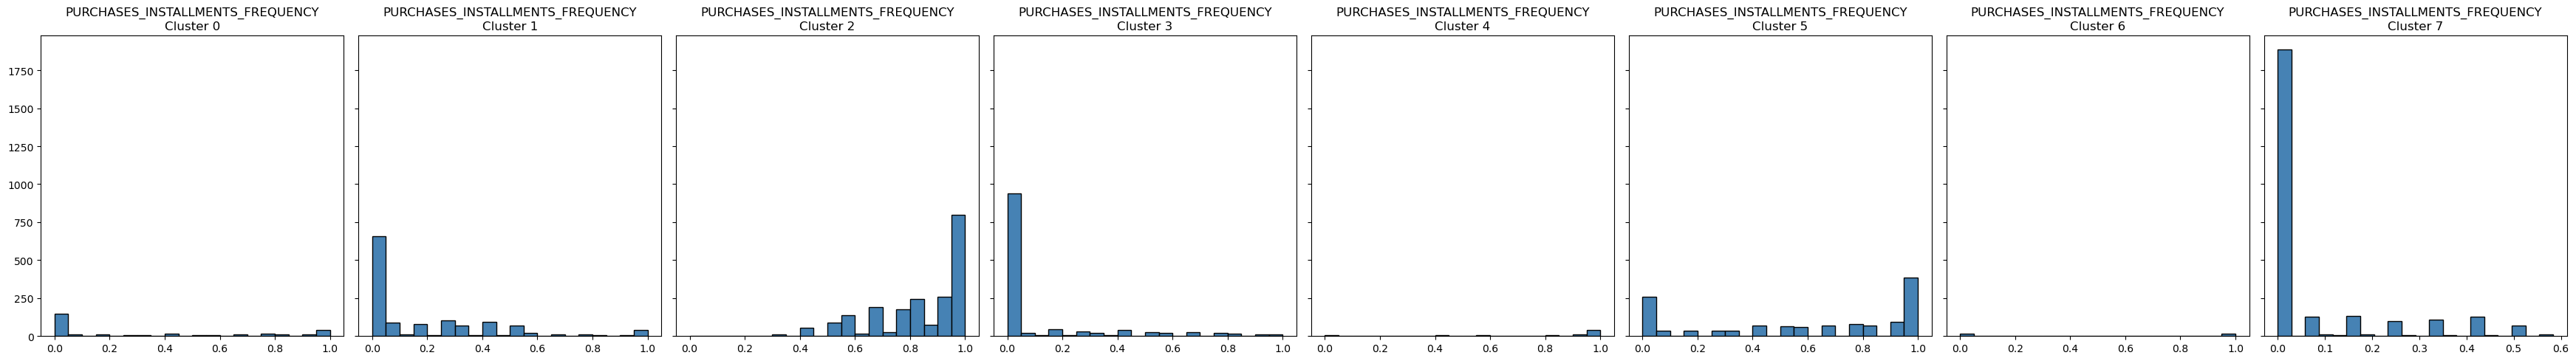

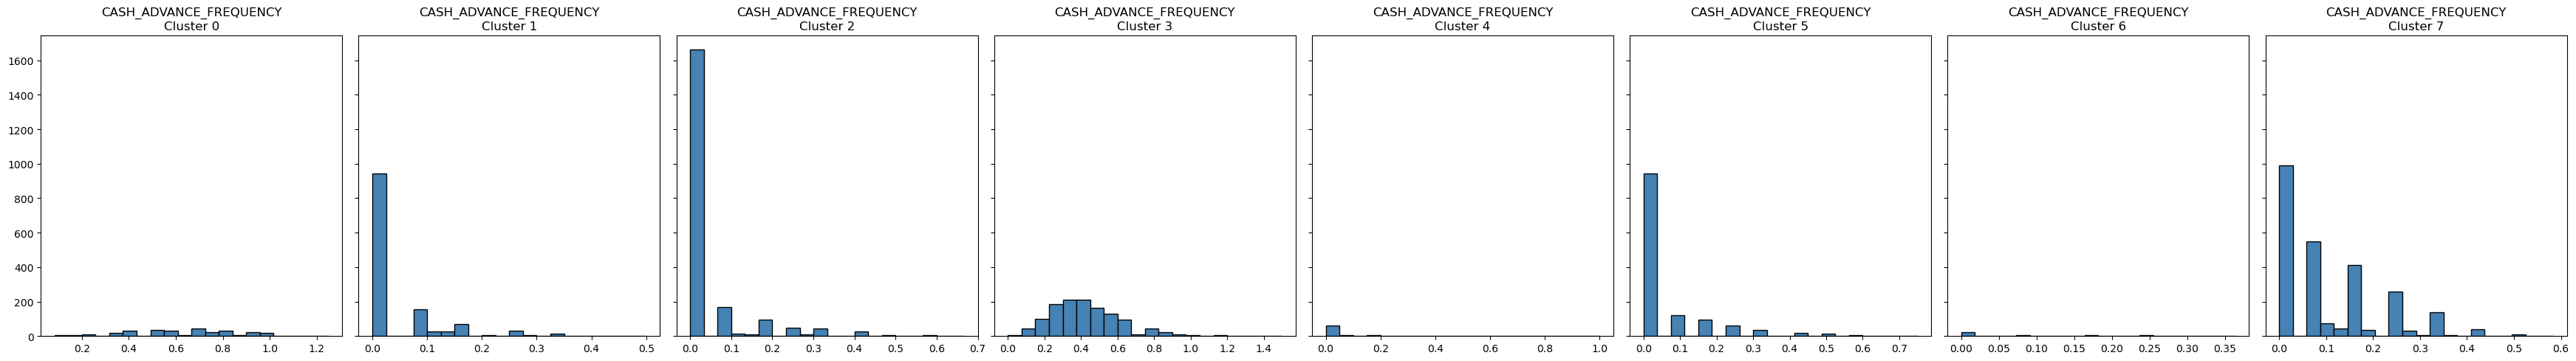

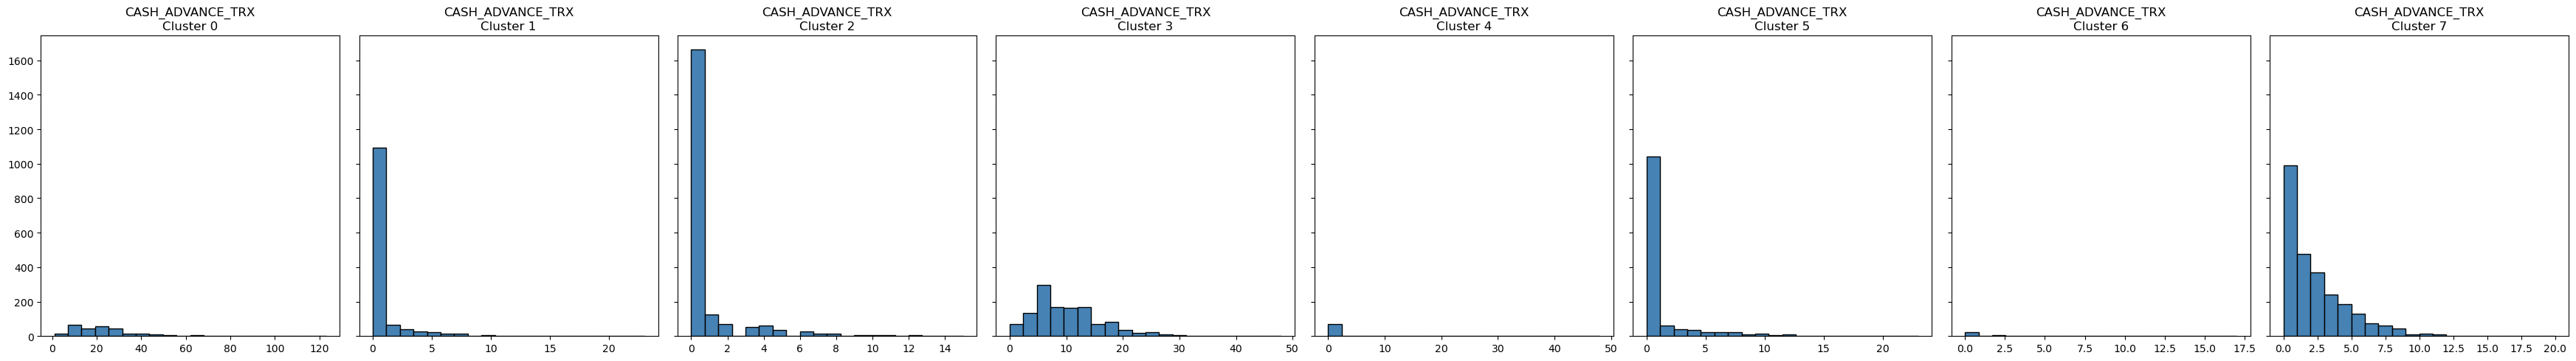

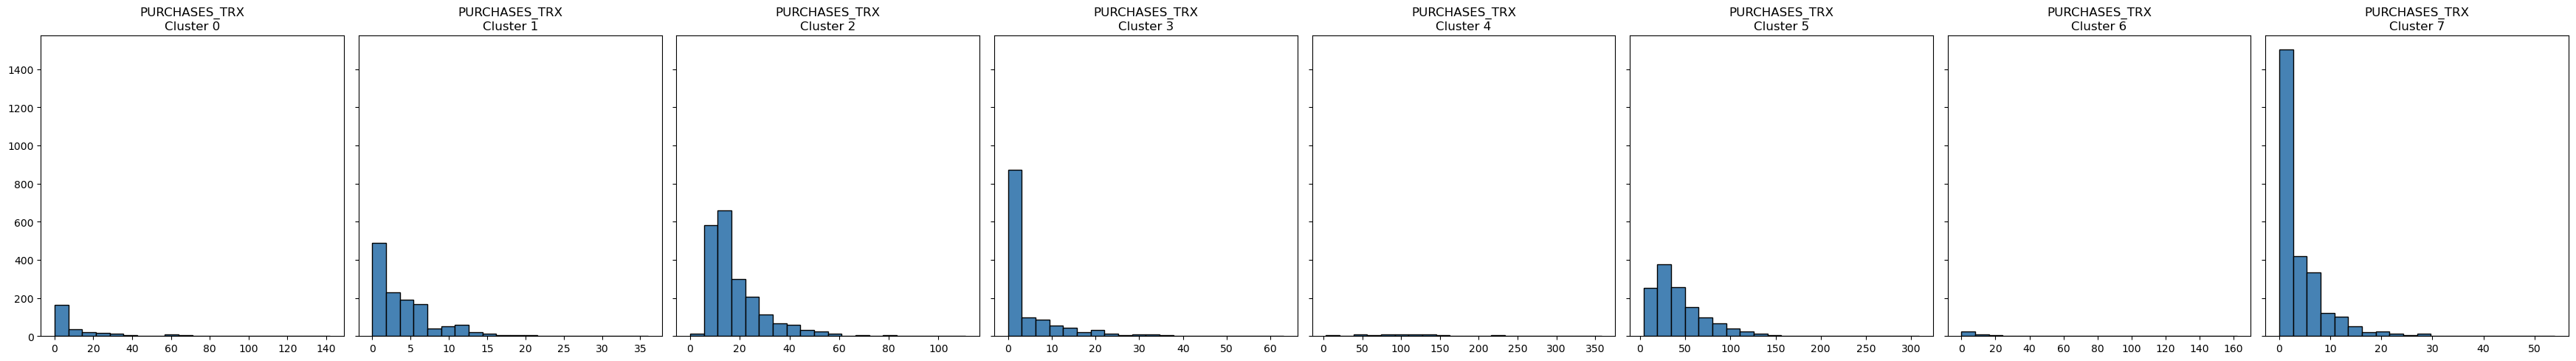

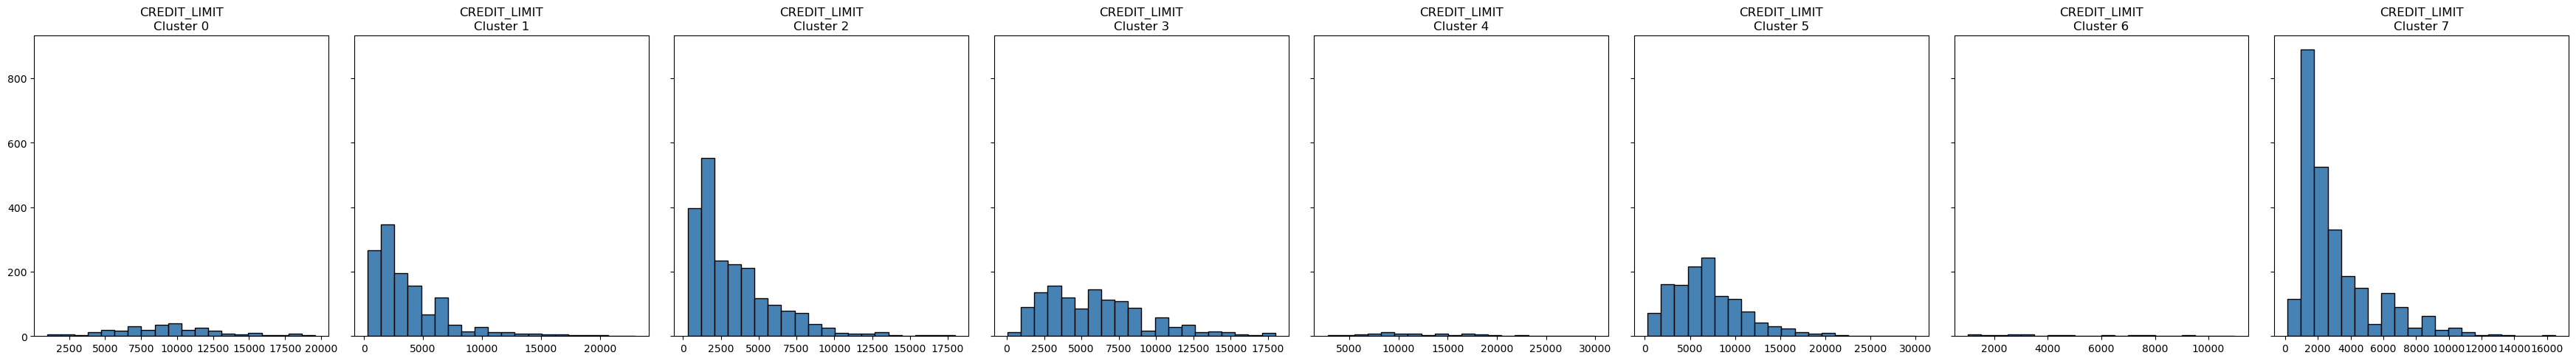

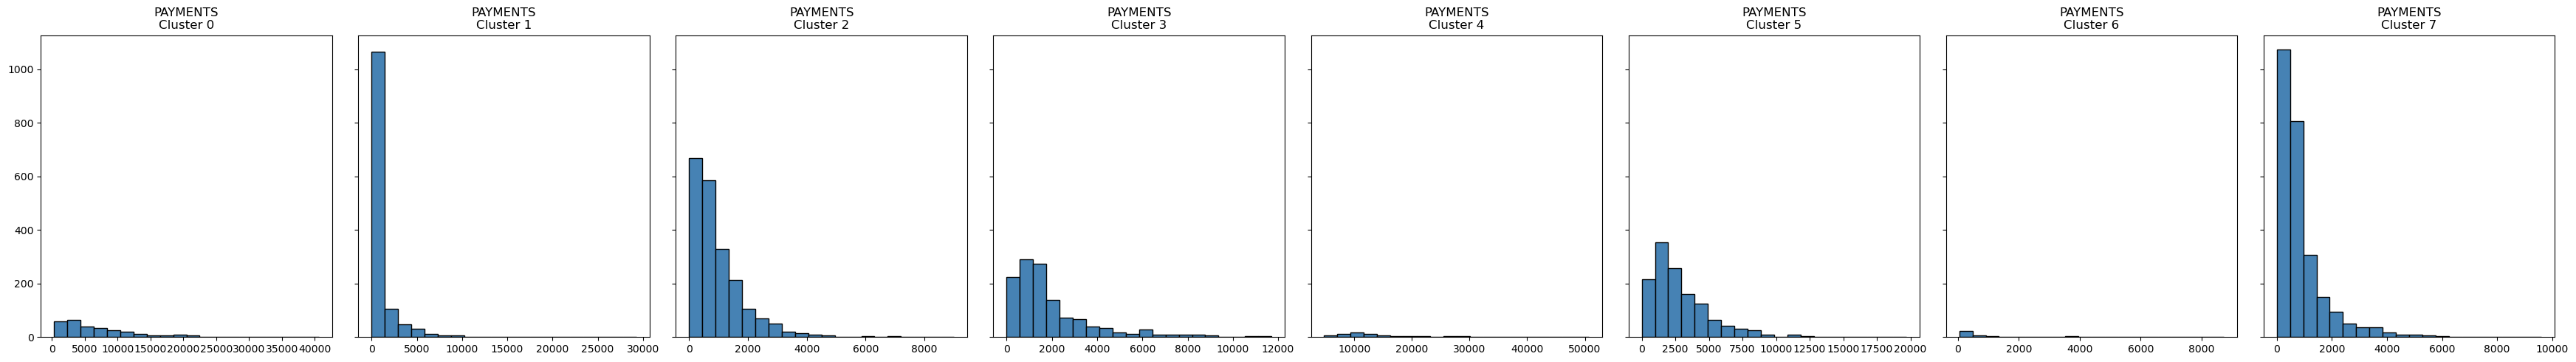

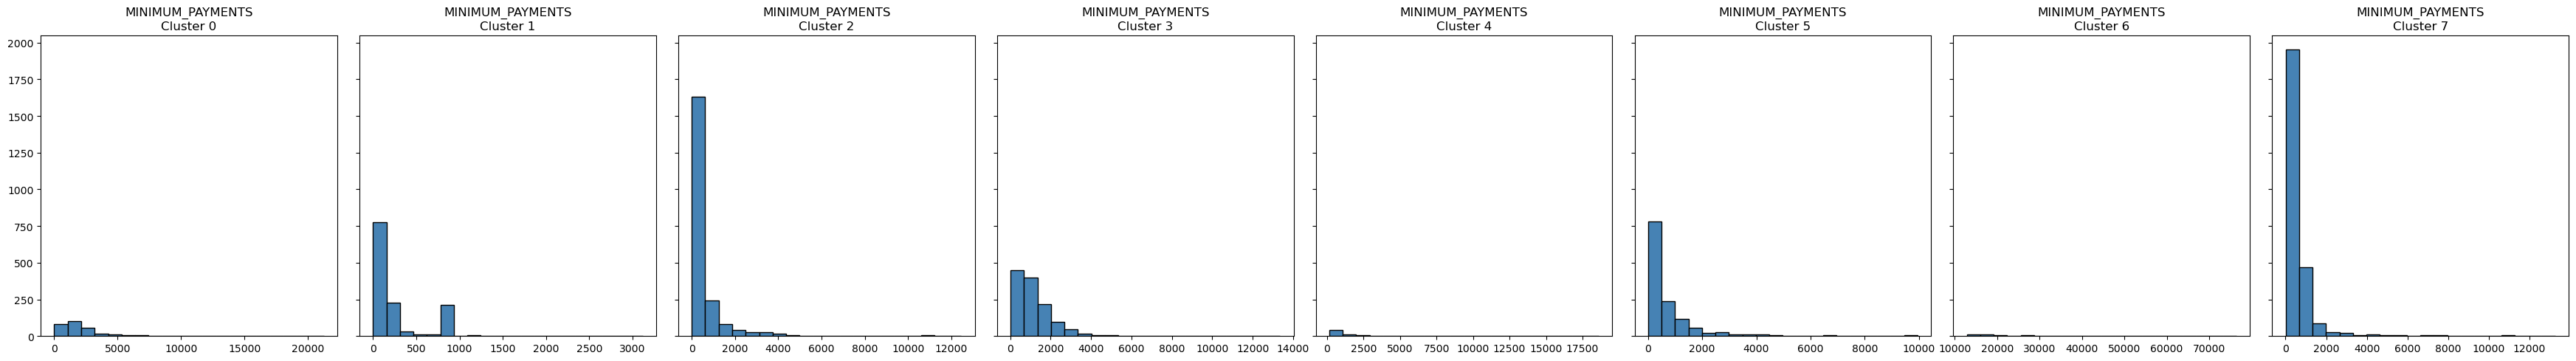

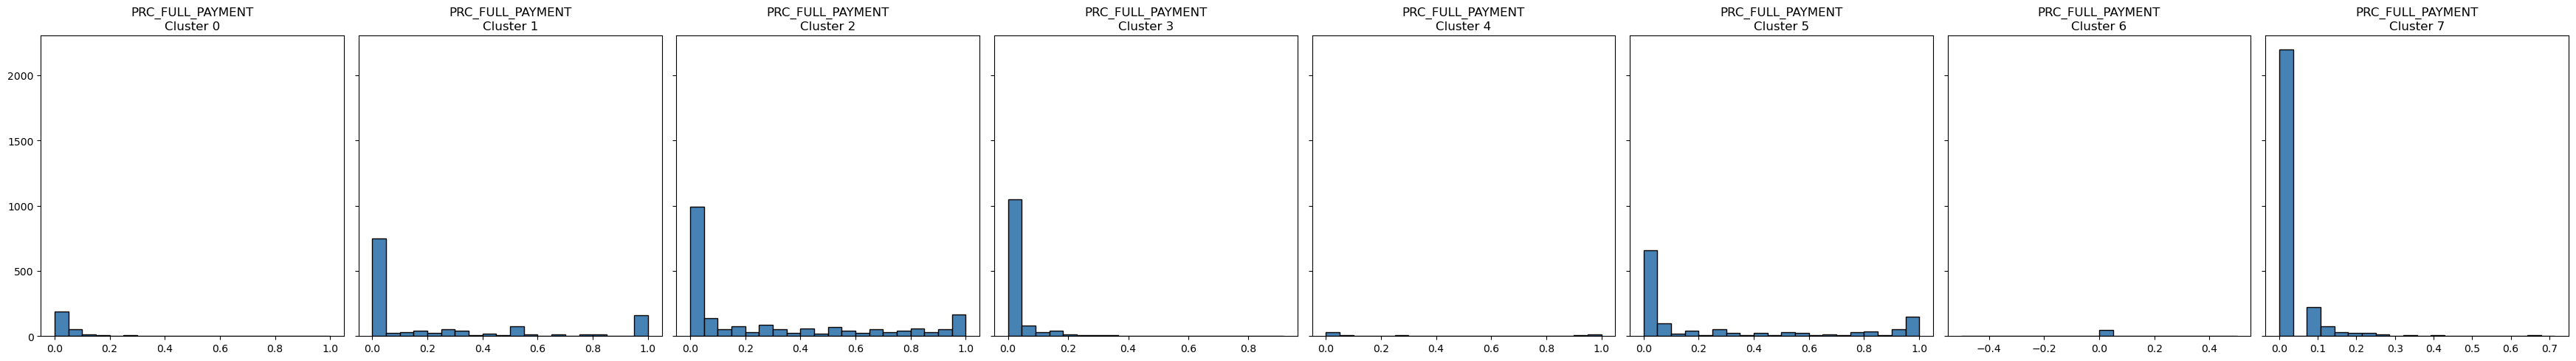

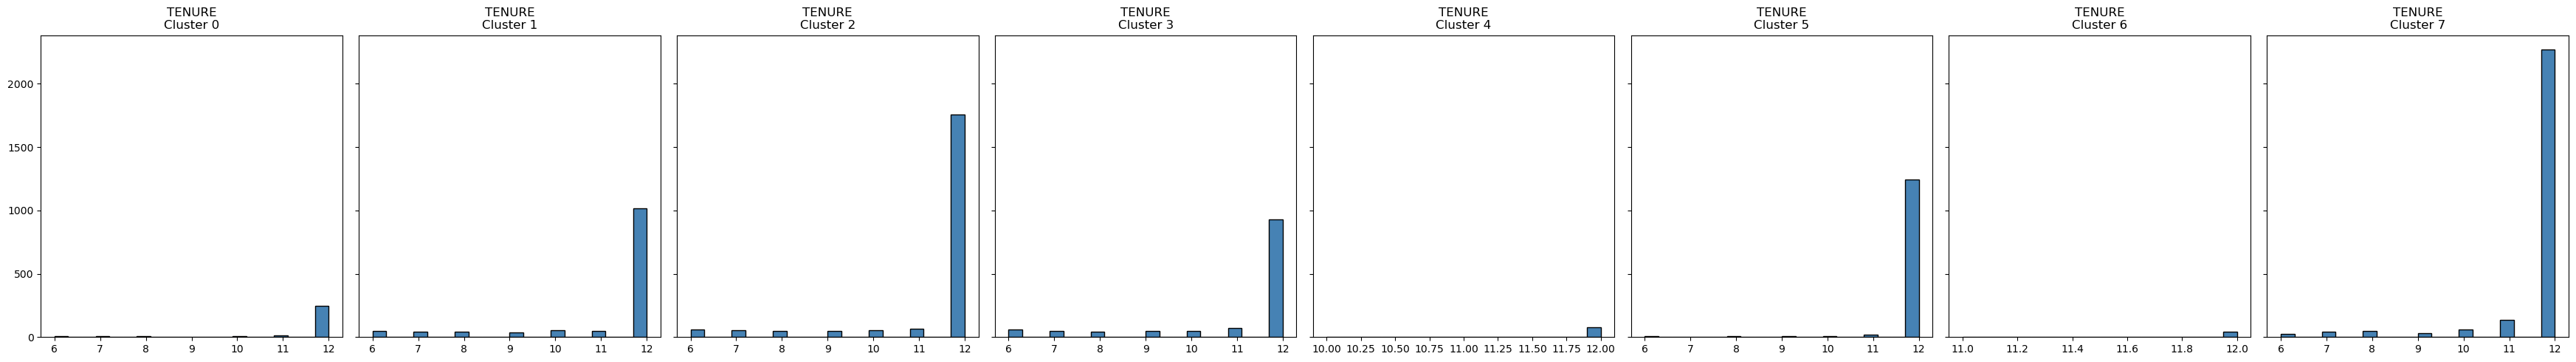

In [29]:
# Plot the histogram of various clusters

for col in df.columns:
    fig, axes = plt.subplots(1, 8, figsize=(35, 5), sharey=True)
    for j in range(8):
        cluster = df_cluster[df_cluster['cluster'] == j]
        axes[j].hist(cluster[col], bins=20, color='steelblue', edgecolor='black')
        axes[j].set_title(f"{col}\nCluster {j}")
    fig.tight_layout()
    plt.show()

## TASK 6: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [33]:
# Obtain the principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = labels
pca_df.head()

PCA1      PCA2  cluster
0 -1.682220 -1.076451        7
1 -1.138295  2.506477        3
2  0.969684 -0.383520        5
3 -0.873628  0.043166        7
4 -1.599434 -0.688581        7

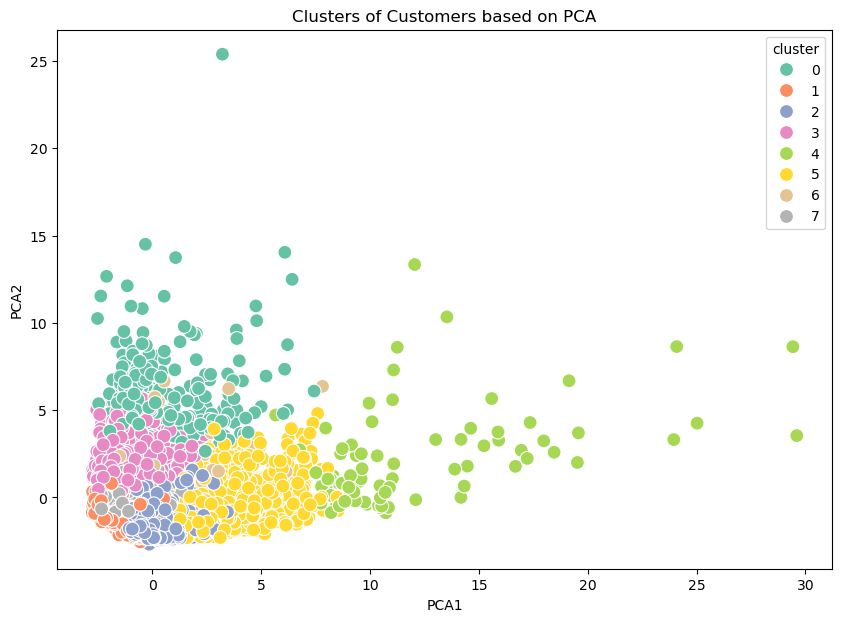

In [34]:
# Visualize the clusters based on the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=100)
plt.title('Clusters of Customers based on PCA')
plt.show()

## TASK #7: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)